In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

okla_filtered = pd.read_csv("/content/drive/MyDrive/dataAnalysis_dataset/output/Turkey_performance_filtered.csv")

In [ ]:
traffic_filtered = pd.read_csv("/content/drive/MyDrive/dataAnalysis_dataset/output/Turkey_traffic_filtered.csv")

# Integration:

   GEOHASH  LONGITUDE   LATITUDE  MINIMUM_SPEED  MAXIMUM_SPEED  AVERAGE_SPEED  \
5   sx7ck8  27.976685  41.003723      43.370099     117.937271      77.897020   
5   sx7ck8  27.976685  41.003723      43.370099     117.937271      77.897020   
7   sx7ckc  27.987671  41.009216      50.491803     103.561475      73.989754   
13  sx7cmm  28.009644  41.031189      57.068804     127.956998      86.227522   
15  sx7cmw  28.020630  41.036682      52.670075     133.207212      86.097955   

    NUMBER_OF_VEHICLES                   geometry  index_right  \
5            25.851542  POINT (27.97668 41.00372)         2766   
5            25.851542  POINT (27.97668 41.00372)         2767   
7            13.176230  POINT (27.98767 41.00922)         2765   
13           16.878812  POINT (28.00964 41.03119)         2761   
15           24.991389  POINT (28.02063 41.03668)         2762   

             quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
5   1203223333322120       87761       1

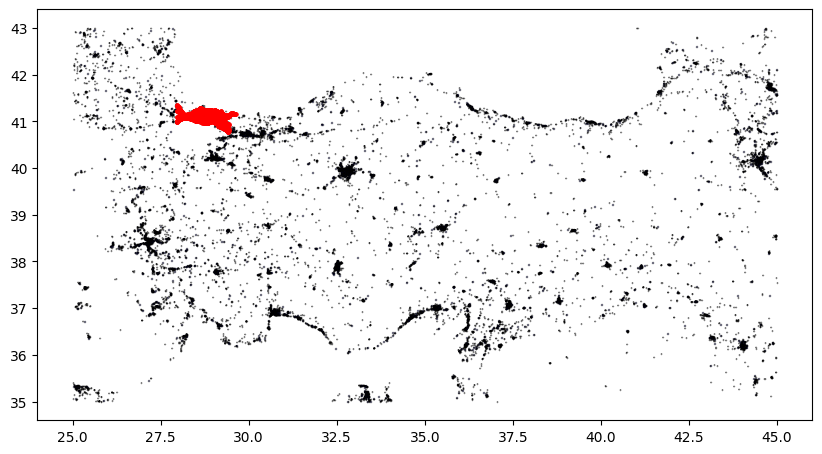

In [ ]:
import geopandas as gpd
from shapely import wkt
from shapely.geometry import Point  # Import Point explicitly

# Ensure geometry is in Polygon for internet performance and Point for traffic
okla_filtered['geometry'] = okla_filtered['geometry_wkt'].apply(wkt.loads)
gdf_internet = gpd.GeoDataFrame(okla_filtered, geometry='geometry')

traffic_filtered['geometry'] = traffic_filtered.apply(
    lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
gdf_traffic = gpd.GeoDataFrame(traffic_filtered, geometry='geometry')

# Step 1: Assign CRS to the datasets (assuming EPSG:4326)
gdf_traffic.crs = "EPSG:4326"  # Assigning WGS 84 CRS to traffic data
gdf_internet.crs = "EPSG:4326"  # Assigning WGS 84 CRS to internet data

# Step 2: Plot both datasets to visualize the overlap
ax = gdf_internet.plot(color='blue', alpha=0.5, edgecolor='k', figsize=(10, 6))
gdf_traffic.plot(ax=ax, color='red', markersize=5)

# Step 3: Perform the spatial join using the 'within' predicate
gdf_joined = gpd.sjoin(gdf_traffic, gdf_internet, how='inner', predicate='within')

# Step 4: If no matches, try a different predicate like 'intersects'
if gdf_joined.empty:
    gdf_joined = gpd.sjoin(gdf_traffic, gdf_internet, how='inner', predicate='intersects')

# Step 5: Check the result of the join
print(gdf_joined.head())


In [ ]:
gdf_joined.columns

Index(['GEOHASH', 'LONGITUDE', 'LATITUDE', 'MINIMUM_SPEED', 'MAXIMUM_SPEED',
       'AVERAGE_SPEED', 'NUMBER_OF_VEHICLES', 'geometry', 'index_right',
       'quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'geometry_wkt'],
      dtype='object')

In [ ]:
gdf_joined

,GEOHASH,LONGITUDE,LATITUDE,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES,geometry,index_right,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry_wkt
5,sx7ck8,27.976685,41.003723,43.370099,117.937271,77.897020,25.851542,POINT (27.97668 41.00372),2766,1203223333322120,87761,13811,16,1,1,"POLYGON ((27.97119140625 41.0047754222295, 27...."
5,sx7ck8,27.976685,41.003723,43.370099,117.937271,77.897020,25.851542,POINT (27.97668 41.00372),2767,1203223333322121,55816,26343,24,1,1,"POLYGON ((27.9766845703125 41.0047754222295, 2..."
7,sx7ckc,27.987671,41.009216,50.491803,103.561475,73.989754,13.176230,POINT (27.98767 41.00922),2765,1203223333322110,45131,1170,17,1,1,"POLYGON ((27.982177734375 41.0130657870063, 27..."
13,sx7cmm,28.009644,41.031189,57.068804,127.956998,86.227522,16.878812,POINT (28.00964 41.03119),2761,1203223333321032,3392,199,32,1,1,"POLYGON ((28.004150390625 41.0337871352186, 28..."
15,sx7cmw,28.020630,41.036682,52.670075,133.207212,86.097955,24.991389,POINT (28.02063 41.03668),2762,1203223333321120,4174,1172,39,2,1,"POLYGON ((28.01513671875 41.0379306224653, 28...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,sxm417,29.591675,41.152039,17.287411,91.477435,56.505938,14.980998,POINT (29.59167 41.15204),6636,1203232322021230,115229,36733,24,1,1,"POLYGON ((29.586181640625 41.1538423571145, 29..."
2299,sxm41s,29.602661,41.157532,43.315789,101.815789,70.907895,12.539474,POINT (29.60266 41.15753),6637,1203232322021302,80221,17248,25,12,3,"POLYGON ((29.59716796875 41.1579782787361, 29...."
2299,sxm41s,29.602661,41.157532,43.315789,101.815789,70.907895,12.539474,POINT (29.60266 41.15753),6638,1203232322021303,42290,16344,47,2,2,"POLYGON ((29.6026611328125 41.1579782787361, 2..."
2301,sxm445,29.624634,41.152039,56.000000,100.666667,73.333333,11.333333,POINT (29.62463 41.15204),6645,1203232322030220,10897,757,27,1,1,"POLYGON ((29.619140625 41.1538423571145, 29.62..."


In [ ]:
# Define the output path in your Google Drive
output_path = "/content/drive/MyDrive/dataAnalysis_dataset/output/Integrated_internet_traffic_data.csv"

# Save the final dataset to CSV
gdf_joined.to_csv(output_path, index=False)

In [ ]:
gdf_joined.duplicated().sum()

0

In [ ]:
gdf_joined.isna().sum()

,0
GEOHASH,0
LONGITUDE,0
LATITUDE,0
MINIMUM_SPEED,0
MAXIMUM_SPEED,0
AVERAGE_SPEED,0
NUMBER_OF_VEHICLES,0
geometry,0
index_right,0
quadkey,0


In [ ]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Filter valid data
gdf_joined = gdf_joined.dropna(subset=['geometry', 'NUMBER_OF_VEHICLES', 'avg_d_kbps'])
gdf_joined = gdf_joined[gdf_joined.geometry.type == 'Point']

# Create heatmap data for congestion levels
heatmap_data = [
    [point.y, point.x, weight]
    for point, weight in zip(
        gdf_joined.geometry,
        gdf_joined['NUMBER_OF_VEHICLES']
    )
    if not pd.isna(point) and not pd.isna(weight)
]

# Create a Folium map centered on Turkey
map_turkey = folium.Map(location=[39.0, 35.0], zoom_start=6)

# Add HeatMap
HeatMap(heatmap_data, radius=15, blur=10, max_zoom=12).add_to(map_turkey)

# Display or save the map
map_turkey


# 1) Heatmap:
traffic congestion levels and corresponding internet speeds.

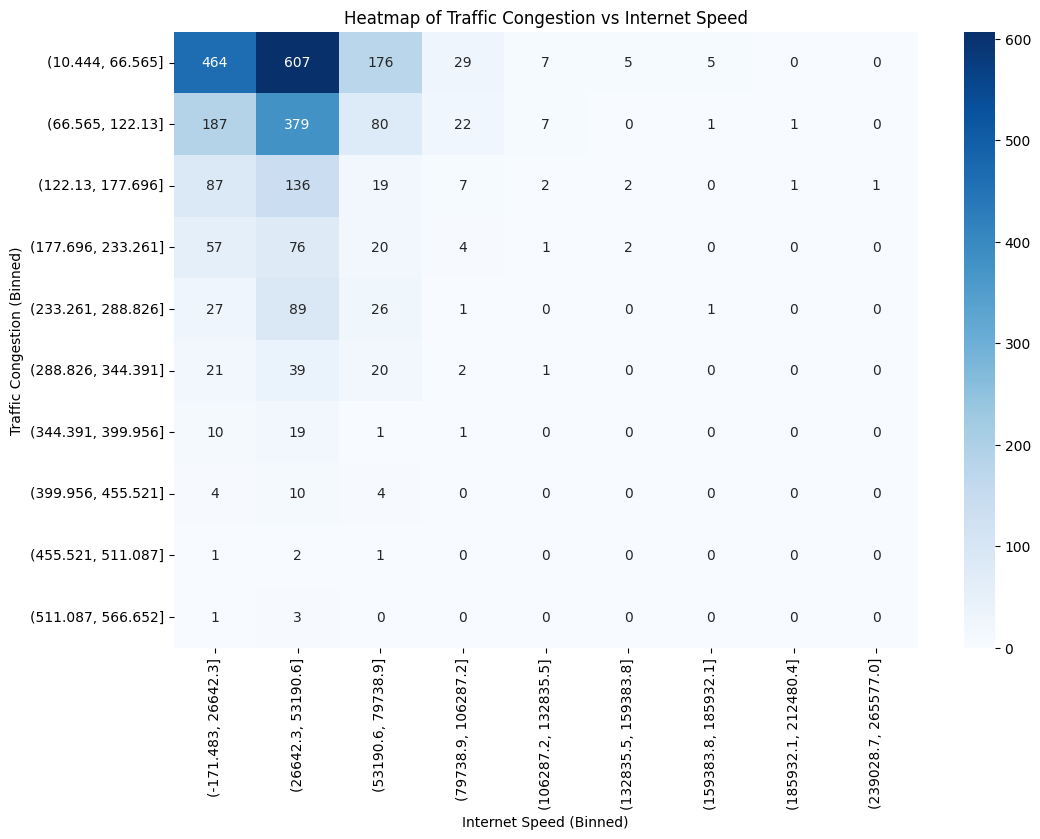

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Assume df2 is your DataFrame with 'NUMBER_OF_VEHICLES' and 'AVERAGE_SPEED'

# Step 1: Bin the congestion levels and internet speeds
bins_congestion = pd.cut(gdf_joined['NUMBER_OF_VEHICLES'], bins=10)  # 10 bins for congestion
bins_speed = pd.cut(gdf_joined['avg_d_kbps'], bins=10)            # 10 bins for speed

# Step 2: Create a crosstab of binned values
heatmap_data = pd.crosstab(bins_congestion, bins_speed)

# Step 3: Plot the heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')

# Customize labels and title
plt.xlabel("Internet Speed (Binned)")
plt.ylabel("Traffic Congestion (Binned)")
plt.title("Heatmap of Traffic Congestion vs Internet Speed")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'gdf_joined' has columns 'NUMBER_OF_VEHICLES' and 'AVERAGE_SPEED'

# Create a pivot table for the heatmap (average internet speed for different congestion levels)
heatmap_data = gdf_joined.pivot_table(
    index='grid_lat',  # Latitude grid
    columns='grid_lon',  # Longitude grid
    values='AVERAGE_SPEED',  # Internet speed
    aggfunc='mean'  # Aggregate function: mean
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title("Heatmap of Internet Speeds and Traffic Congestion Levels")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# 2) Scatter Plot:
Correlate congestion levels with internet performance metrics.


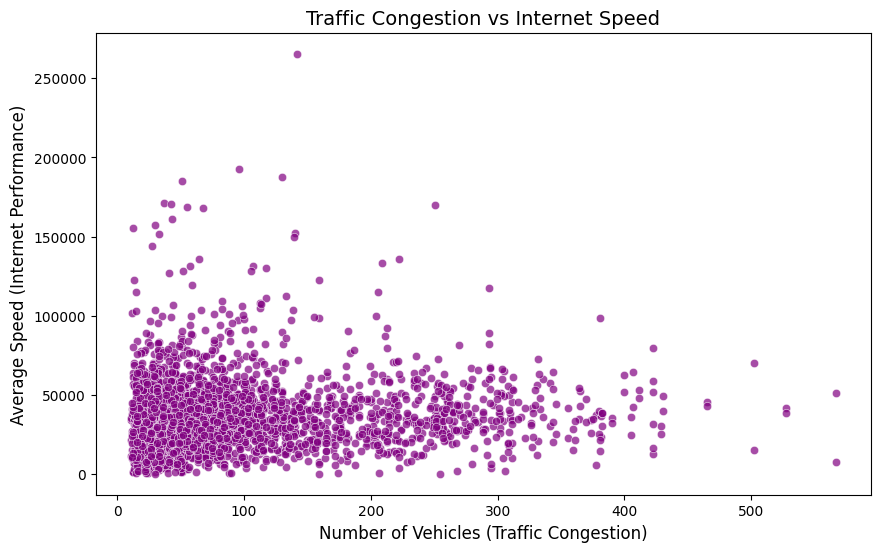

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Plot a scatter plot to correlate traffic congestion with internet performance metrics
plt.figure(figsize=(10, 6))

# Scatter plot: Traffic congestion (NUMBER_OF_VEHICLES) vs Internet speed (avg_d_kbps)
sns.scatterplot(data=gdf_joined, x='NUMBER_OF_VEHICLES', y='avg_d_kbps', alpha=0.7, color='purple')

# Adding title and labels
plt.title("Traffic Congestion vs Internet Speed", fontsize=14)
plt.xlabel("Number of Vehicles (Traffic Congestion)", fontsize=12)
plt.ylabel("Average Speed (Internet Performance)", fontsize=12)

# Display the plot
plt.show()


In [ ]:
 correlation= gdf_joined['NUMBER_OF_VEHICLES'].corr(gdf_joined['avg_d_kbps'])
print(f"Pearson correlation: {correlation:.2f}")

Pearson correlation: 0.05


# 3) Geospatial Overlay:
Map congestion areas and overlay mobile internet speeds.


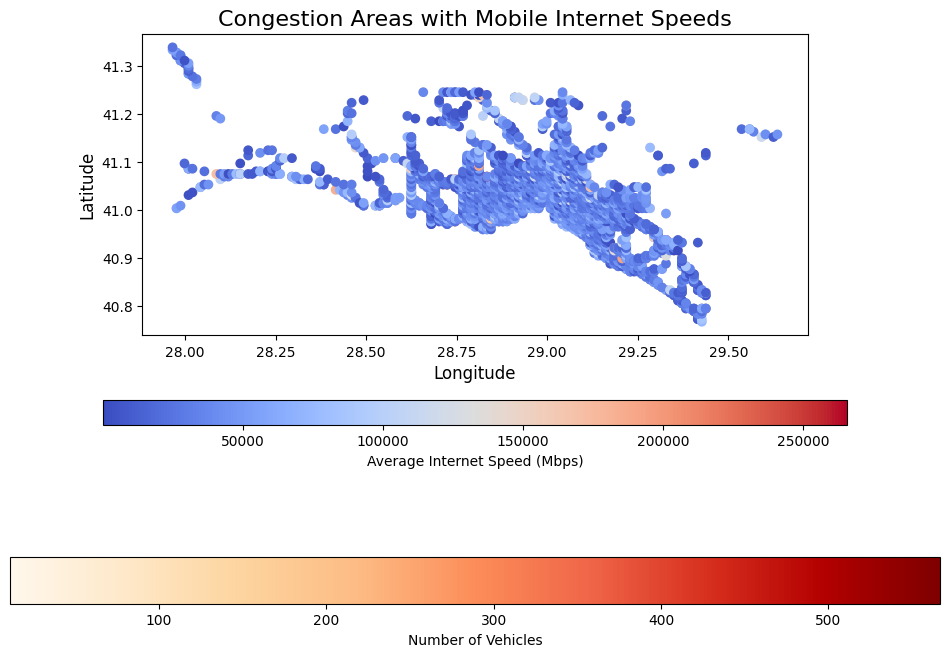

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Step 1: Prepare the geospatial data (assuming gdf_joined is already prepared)
# We will plot the congestion areas (number of vehicles) and overlay internet speeds (average speed).

# Create a base plot for the congestion areas (using a color scale based on the NUMBER_OF_VEHICLES)
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the congestion areas with colors based on the number of vehicles
gdf_joined.plot(column='NUMBER_OF_VEHICLES', ax=ax, legend=True, cmap='OrRd',
                legend_kwds={'label': "Number of Vehicles", 'orientation': "horizontal"})

# Step 2: Overlay internet speeds on top of congestion areas
# We will color the internet speeds (average speed) using a different color scale (for example: coolwarm)

gdf_joined.plot(column='avg_d_kbps', ax=ax, legend=True, cmap='coolwarm',
                legend_kwds={'label': "Average Internet Speed (Mbps)", 'orientation': "horizontal",
                             'shrink': 0.8, 'aspect': 30})

# Step 3: Customize the map (optional)
# Adding a title
ax.set_title('Congestion Areas with Mobile Internet Speeds', fontsize=16)

# Set axis labels
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Display the plot
plt.show()


# 4)	Bar Chart:
Compare internet speeds in high and low-congestion areas.


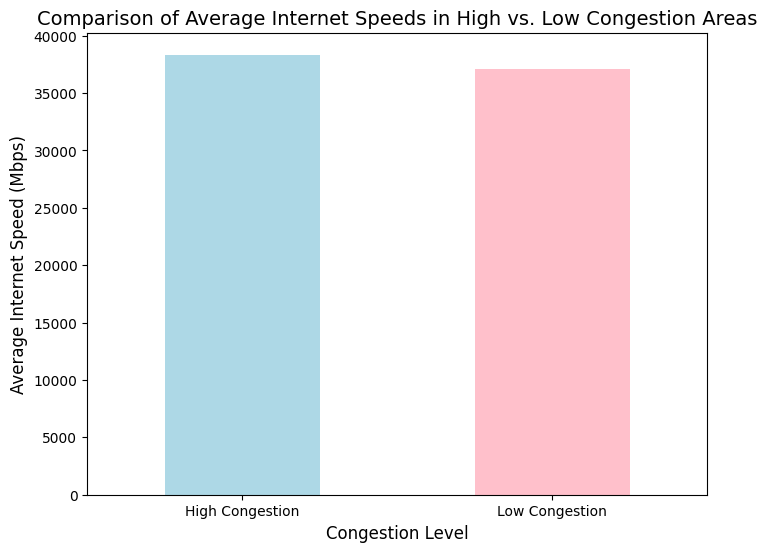

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define a threshold for high and low congestion (e.g., top 25% for high congestion)
congestion_threshold = gdf_joined['NUMBER_OF_VEHICLES'].quantile(0.75)

# Step 2: Create a new column to categorize congestion
gdf_joined['congestion_level'] = gdf_joined['NUMBER_OF_VEHICLES'].apply(
    lambda x: 'High Congestion' if x >= congestion_threshold else 'Low Congestion'
)

# Step 3: Calculate average internet speed for high and low congestion areas
avg_speed_by_congestion = gdf_joined.groupby('congestion_level')['avg_d_kbps'].mean()

# Step 4: Plot the bar chart
plt.figure(figsize=(8, 6))
avg_speed_by_congestion.plot(kind='bar', color=['lightblue', 'pink'])

# Step 5: Customize the plot
plt.title('Comparison of Average Internet Speeds in High vs. Low Congestion Areas', fontsize=14)
plt.xlabel('Congestion Level', fontsize=12)
plt.ylabel('Average Internet Speed (Mbps)', fontsize=12)
plt.xticks(rotation=0)
plt.show()


# 5) Line Chart:
o	Show internet speed trends during peak and off-peak traffic periods.

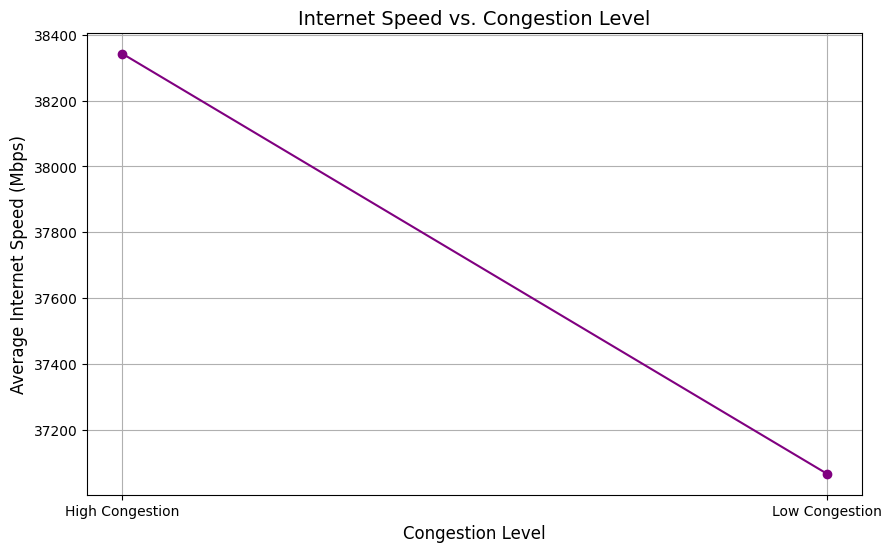

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Group by congestion level and calculate average speed for each level
avg_speed_by_congestion = gdf_joined.groupby('congestion_level')['avg_d_kbps'].mean().reset_index()

# Step 2: Sort by congestion level (if needed) to visualize the trend more clearly
avg_speed_by_congestion = avg_speed_by_congestion.sort_values(by='congestion_level')

# Step 3: Plot the line chart
plt.figure(figsize=(10, 6))

plt.plot(avg_speed_by_congestion['congestion_level'], avg_speed_by_congestion['avg_d_kbps'], marker='o', color='purple')

# Step 4: Customize the plot
plt.title('Internet Speed vs. Congestion Level', fontsize=14)
plt.xlabel('Congestion Level', fontsize=12)
plt.ylabel('Average Internet Speed (Mbps)', fontsize=12)
plt.grid(True)
plt.show()
